<a href="https://colab.research.google.com/github/fahimabrar/Machine-Learning/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [197]:
import pandas as pd

data = pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/fahimabrar/Machine-Learning/main/data/IRIS.csv"))

In [198]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [199]:
data.shape

(150, 5)

In [200]:
data = data.drop(columns = ['species'])

In [201]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [202]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [255]:
dbscan = DBSCAN(eps = 1, min_samples = 8)

In [256]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [257]:
dbscan.fit(scaled_data)
label = dbscan.labels_
import numpy as np
np.unique(label)

array([-1,  0,  1])

In [258]:
data["cluster_id"] = label
data.cluster_id.value_counts()

 1    98
 0    49
-1     3
Name: cluster_id, dtype: int64

In [259]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster_id
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


- 98 data are fall into one cluster, 49 into others
- 3 data are unclassified

In [277]:
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


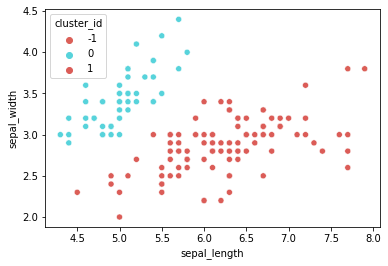

In [278]:
sns.scatterplot(data.sepal_length, data.sepal_width, hue = data.cluster_id, palette="hls")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


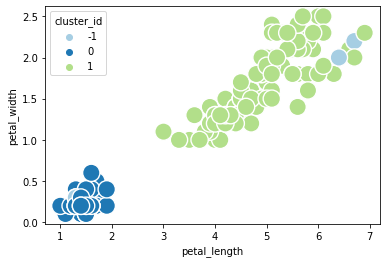

In [287]:
sns.scatterplot(data.petal_length, data.petal_width, hue = data.cluster_id, palette="Paired", s = 300)